<a href="https://colab.research.google.com/github/Juliana001/Identificacao-de-queimadas-em-tempo-real-por-imagens-de-satelites/blob/main/C%C3%B3digos%20utilizados%20na%20pesquisa/Puxando_arquivos_NetCDF_do_GOES19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ![Apresentacao](https://drive.google.com/uc?export=view&id=1RPdATkmT9yQd1lhKEpJjNgcrD_WQv6gn)


## Esse notebook tem como objetivo auxiliar o processo de aquisição de dados do satélite GOES19

### Todas as estruturas dos códigos foram tiradas da documentação da biblioteca GOES2GO: https://goes2go.readthedocs.io/en/latest/index.html

#O primeiro passo é instalar e importar todas as bibliotecas necessárias

In [2]:
!pip install goes2go

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.4/424.4 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.0/201.0 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.8/306.8 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing

In [3]:
from goes2go import GOES
from goes2go import GOES
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from goes2go.data import goes_nearesttime
from datetime import datetime, timedelta
import pandas as pd


 ╭─goes2go──────────────────────────────────────────────╮
 │ INFO: Created a default config file.                 │
 │ You may view/edit goes2go's configuration here:      │
 │           /root/.config/goes2go/config.toml          │
 ╰──────────────────────────────────────────────────────╯



/usr/local/lib/python3.12/dist-packages/goes2go/__init__.py:141: UserWarning: Metpy not imported.
  from goes2go.data import goes_latest, goes_nearesttime, goes_timerange


#O segundo passo é puxar os dados

####Essa parte consome RAM consideravelmente (aproximadamente 4GB)
Para entender o que cada um desses argumentos significa, recomendo fortemente que visite a documentação oficial da biblioteca, mais especificadamente: https://goes2go.readthedocs.io/en/latest/reference_guide/index.html#goes2go.data.goes_nearesttime

In [4]:
g = goes_nearesttime(
    datetime(2025, 9, 25, 16), satellite="goes19", product="ABI-L2-MCMIPF", domain='F',return_as="xarray"
)

📦 Finished downloading [1] files to [/root/data/noaa-goes19/ABI-L2-MCMIPF].
📖💽 Reading (1/1) file from LOCAL COPY [/root/data/noaa-goes19/ABI-L2-MCMIPF/2025/268/16/OR_ABI-L2-MCMIPF-M6_G19_s20252681600192_e20252681609506_c20252681609583.nc]. 

/usr/local/lib/python3.12/dist-packages/xarray/backends/plugins.py:148: RuntimeWarning: Engine 'gini' loading failed:
module 'numpy._core._multiarray_umath' has no attribute '_blas_supports_fpe'
  engines = list_engines()


📚 Finished reading [1] files into xarray.Dataset.


#O terceiro passo é plotar, uma vez que você já tem acesso ao NetCDF em formato xarray na variável g.



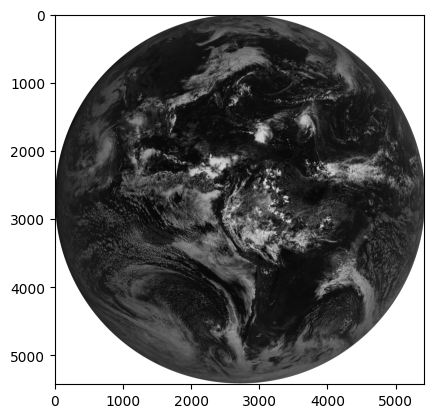

In [5]:
plt.imshow(g.CMI_C01.data, cmap="gray")
plt.show()

A imagem mostrada acima corresponde aos dados da banda 1. Para entender o que cada uma das bandas pode oferecer, você pode acessar a pasta Arquivos gerados durante a pesquisa, e procurar por Guia_de_bandas_GOES19.v2.0.pdf

#É possível plotar a imagem em truecolor e com as fronteiras do continente e de estados, para tanto é preciso primeiro instalar e importar mais algumas bibliotecas

In [6]:
!pip install geopandas cartopy matplotlib xarray

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:205: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  result_path = self.acquire_resource(target_path, format_dict)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:205: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lines.zip
  result_path = self.acquire_resource(target_path, format_dict)


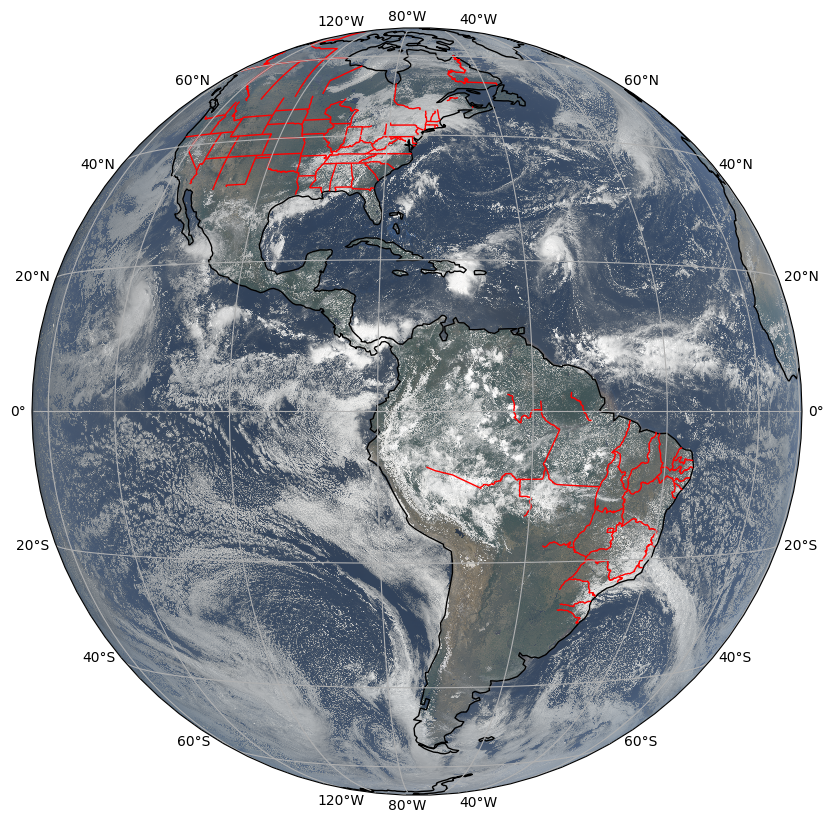

In [8]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': g.rgb.crs})

# Plot TrueColor do GOES
ax.imshow(g.rgb.TrueColor(), **g.rgb.imshow_kwargs)

# Adicionar linhas costeiras e grid
ax.coastlines()
ax.gridlines(draw_labels=True)

# Adicionar limites internos (estados/províncias)
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none'
)

ax.add_feature(states_provinces, edgecolor='red', linewidth=1)

plt.show()


#Se quiser, ainda é possível dar um zoom em alguma região ou estado específico. No caso da presente pesquisa, temos interesse no estado de Goiás, sendo assim, segue um zoom no estado de Goiás.

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:205: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  result_path = self.acquire_resource(target_path, format_dict)


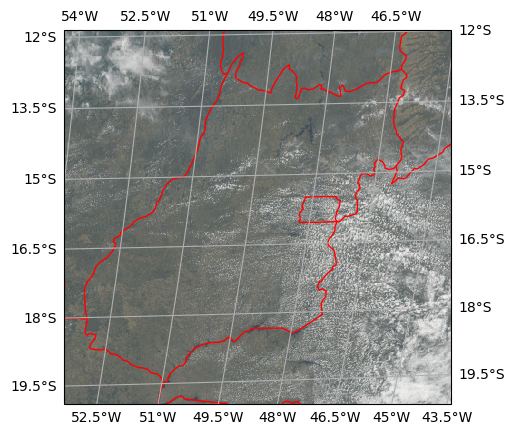

In [10]:
# Limites aproximados de Goiás
lon_min, lon_max = -53.3, -45.1
lat_min, lat_max = -19.9, -12.0

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': g.rgb.crs})

# Plot TrueColor do GOES
ax.imshow(g.rgb.TrueColor(), **g.rgb.imshow_kwargs)

# Adicionar linhas costeiras e grid
ax.coastlines()
ax.gridlines(draw_labels=True)

# Limites internos (estados)
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none'
)
ax.add_feature(states_provinces, edgecolor='red', linewidth=1)

# Definir zoom
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

plt.show()
